# <center/>TITANIC DATA - Filling in Missing Data and Prediction<center>


<img src = "https://www.currentaffairs.org/hubfs/Imported_Blog_Media/titanicii-1024x646-1.jpg" width=800>

**DATA DICTIONARY**

**- survived:** survival	0 = No, 1 = Yes

**- pclass:**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

**- sex:**	Sex	

**- Age:**	Age in years	

**- sibsp:**	# of siblings / spouses aboard the Titanic	

**- parch:**	# of parents / children aboard the Titanic	

**- ticket:**	Ticket number	

**- fare:**	Passenger fare	

**- cabin:**	Cabin number	

**- embarked:**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### IMPORTING PACKAGES AND DATA

In [1020]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [1021]:
train = pd.read_csv("ttrain.csv") # train data

In [1022]:
test = pd.read_csv("ttest.csv") # test data 

## EDA

In [1023]:
test.head() # the first 5 observations in the test data 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1024]:
train.head() # the first 5 observations in the train data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1025]:
test.shape # shape of the test data 

(418, 11)

In [1026]:
train.shape # shape of the train data 

(891, 12)

In [1027]:
687/891 

0.7710437710437711

**in the train data, almost 77 % of the variable of "Cabin" is missing values**

In [1028]:
177/891 

0.19865319865319866

**In the train data, almost 20 % of the variable of "Age" is missing values.**

In [1029]:
train["Embarked"].value_counts() # There are 2 missing rows and 3 categories in the embarked variable

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1030]:
test.isnull().sum() # missing values information for every single variables

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1031]:
test.shape # the numbers of rows and columns on the test set 

(418, 11)

In [1032]:
327/418 # in the test data, 78% of the "cabin" variable is missing 

0.7822966507177034

In [1033]:
86/418 # in the test  data 20 % of the Age variable is missing 

0.20574162679425836

In [1034]:
# Fare değişkeni sayısal ve test setinde 1 gözlem eksik
# trainde embarked değişkeni kategorik ve 2 gözlem eksik train boyutu 891 test boyutu 418

In [1035]:
df = pd.concat([train, test], axis=0, ignore_index=True) # combining the test and the train data 
# if we add the argument of "ignore_index=True", we prevent columns names from being included as an observation.
# the argument of "axis = 0" means combining the data vertically 

In [1036]:
df.corr(numeric_only=True)["Fare"] 

#The correlation variables between the every single numeric and independent variables and the target variable "Fare"

PassengerId    0.031428
Survived       0.257307
Pclass        -0.558629
Age            0.178740
SibSp          0.160238
Parch          0.221539
Fare           1.000000
Name: Fare, dtype: float64

In [1037]:
df.isnull().sum() # Checking The Missing Values in The Variables 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [1038]:
df.describe() # Descriptive Statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


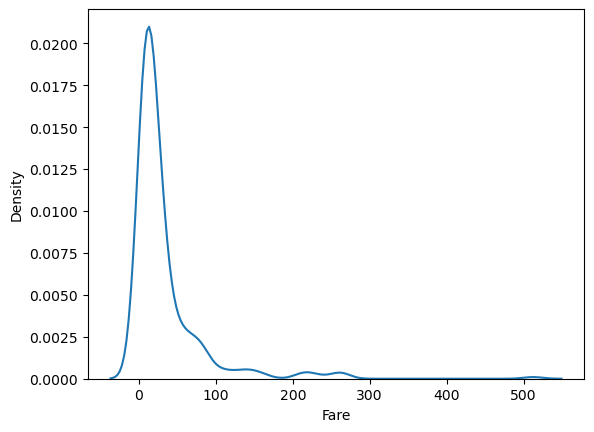

In [1039]:
sns.kdeplot(df["Fare"]); 
# The observations of the Fare variable have a skewed distribution. 
# Thus It is a more correct choice to fill the missing values with median then to fill with mean value

In [1040]:
df["Fare"].median() # Median of the variable "Fare"

14.4542

In [ ]:
# Fill the missing values of variable "Fare" with median 
df["Fare"] = df["Fare"].fillna(14.4542)

In [1041]:
df["Embarked"].mode()[0] # Mode of the variable "Embarked" 


'S'

In [1043]:
df["Embarked"] = df["Embarked"].fillna("S") 
#If The variable is categorical and if the number of missing values in the variable,
#fill the variable with the mode value 

In [1044]:
df.isnull().sum() # Check the missing values again 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

** We should categorize the name variable by creating a new "title" variable according to the titles in front of the travelers' names (Mr., Mrs. etc.):**

In [1045]:
def assign_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Master.' in name:
        return 'Master'
    else:
        return 'Other'  

# Use the function "apply" to create the new column "title" 
df['title'] = df['Name'].apply(assign_title)

In [1046]:
df.head() # Look at the new column 'title'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1047]:
df["title"].value_counts() # the number of observations for every category in the "title"

title
Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: count, dtype: int64

In [1048]:
df.isnull().sum() # check the missing values again

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
title             0
dtype: int64

**according to the missing values in the column "Age", we should separate the data:**

In [1049]:
dolu= df[df["Age"].notnull()] # non-missing part of the data
bos=df[df["Age"].isnull()]  # missing part of the data 


In [1050]:
bos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss


**calculate median for every titles and fill missing age values according to the titles** 

In [1051]:
title_medians=dolu.groupby('title')['Age'].median()

In [1052]:
df["Age"] = df.apply(lambda row: title_medians[row["title"]] 
                    if pd.isnull(row["Age"]) else row["Age"], axis=1)

df["Age"].isnull().sum() # there isnt any missing value in the varibale of "Age" now 

0

In [1053]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


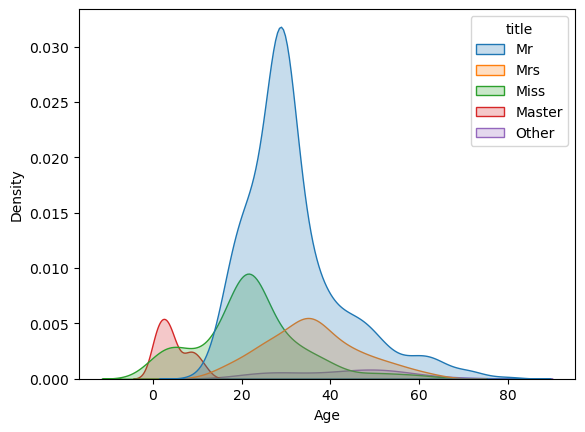

In [1072]:
sns.kdeplot(data=dolu, x='Age', hue='title', fill=True);
# distribution graph of the variable of "Age" for the every title

**the values of Age are distributed more normal than the values in the other categories**

**We filled the missing values in the variable of Cabin with "Unknown":

In [1054]:
df.loc[df["Cabin"].isnull(), "Cabin"] = "Unknown"

In [1055]:
df.isnull().sum() # Check the missing values 

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
title            0
dtype: int64

**according to missing values in "Survived", separate the data as full or empty**

In [1056]:
bos= df[df["Survived"].isnull()] # missing data
dolu = df[df["Survived"].notnull()] # non-missing data

In [1057]:
bos.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
title            0
dtype: int64

In [1058]:
dolu["Survived"].value_counts() # The variable of "Survived" has 2 types of value as 1 and 2

Survived
0.0    549
1.0    342
Name: count, dtype: int64

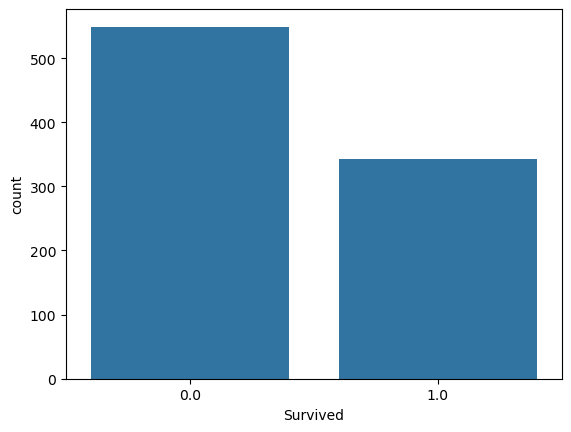

In [1059]:
sns.countplot(x=df["Survived"]); # Draw a bar chart for the Frequences of observations in the data

In [1060]:
dolu.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr


**separate the non-missing data as x and y for modeling and**

**drop the columns/variables in x data which will not used in the modelling:**

In [1061]:
x= dolu.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1) #independent variables data 
y= dolu["Survived"] # target variable 

In [1062]:
x=pd.get_dummies(x, drop_first=True) # dummy transformation for every categorical varibles

### TEST & TRAIN

In [1063]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
# split the data - 20% of the data = test 

### MODELING - CLASSIFICATION

**We will use Gaussian, Bernoulli, Lojistic Regression, Decision Trees, Random Forest, Gradient Boosting and K-Neighbors modelling methods for classification:**

In [1064]:
g= GaussianNB() # Gaussian Model
g.fit(x_train, y_train) # model training with the train sets
gtahmin = g.predict(x_test) # prediction of test


In [1065]:
accuracy_score(gtahmin, y_test) # the performance metric of gauissian classification

0.7653631284916201

**The Model predicted 77 % of the data correctly**

In [1066]:
confusion_matrix(gtahmin, y_test)

array([[83, 20],
       [22, 54]], dtype=int64)

The model predicted 83 values of 103 values of 0

In [1067]:
print(classification_report(gtahmin, y_test)) # other metrics for every category

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       103
         1.0       0.73      0.71      0.72        76

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179



**The model correctly predicted 79% of the category "0"  and 73% of the category "1"**

In [1068]:
b=BernoulliNB() # Bernoulli Model
b.fit(x_train, y_train) # model training
btahmin = b.predict(x_test) # prediction 


In [1069]:
accuracy_score(btahmin, y_test) #model prediction performance 

0.7988826815642458

In [1070]:
confusion_matrix(btahmin, y_test)

array([[88, 19],
       [17, 55]], dtype=int64)

In [1073]:
# l= LogisticRegression() # Logistic Regression Model
# l.fit(x_train, y_train)
# ltahmin = l.predict(x_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1074]:
print(classification_report(ltahmin, y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       111
         1.0       0.69      0.75      0.72        68

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [1075]:
confusion_matrix(ltahmin, y_test)

array([[88, 23],
       [17, 51]], dtype=int64)

In [1076]:
d=DecisionTreeClassifier() # Decision Tree Model
d.fit(x_train, y_train) # model training
dtahmin = d.predict(x_test) # predictions


In [1077]:
print(classification_report(dtahmin, y_test)) # model performance 

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       103
         1.0       0.77      0.75      0.76        76

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [1078]:
r=RandomForestClassifier() # Random Forest Model
r.fit(x_train, y_train) # model training
rtahmin =r.predict(x_test) # predictions


In [1079]:
confusion_matrix(rtahmin, y_test)

array([[91, 15],
       [14, 59]], dtype=int64)

In [1080]:
print(classification_report(rtahmin, y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       106
         1.0       0.80      0.81      0.80        73

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [1081]:
h=GradientBoostingClassifier() # Gradient Boosting Model
h.fit(x_train, y_train) # training model
htahmin =h.predict(x_test) # prediction


In [1082]:
confusion_matrix(htahmin,y_test)

array([[90, 19],
       [15, 55]], dtype=int64)

In [1083]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       109
         1.0       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



In [1101]:

# k =KNeighborsClassifier()
# k.fit(x_train, y_train)
# ktahmin = k.predict(np.array(x_test))


In [1085]:
confusion_matrix(ktahmin, y_test)

array([[90, 42],
       [15, 32]], dtype=int64)

In [1086]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76       132
         1.0       0.43      0.68      0.53        47

    accuracy                           0.68       179
   macro avg       0.64      0.68      0.64       179
weighted avg       0.75      0.68      0.70       179



**<font color=red>Random Forest Classifier model is the most successful model. The performance metrics of the model is higher than the others.**

**Give the test x variables to trained random forest classifier model and predict the test y variable to determine survival information of travelers:**

In [1087]:
# y test data is already is missing, therefore we will use predicitons as y . It is not need to define an extra y test data 

x_bos= bos.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)  
x_bos=pd.get_dummies(x_bos, drop_first=True)

In [1088]:
r=RandomForestClassifier()
r.fit(x_train, y_train)
rtahmin =r.predict(x_bos)

In [1089]:
len(rtahmin) # the number of predicted observations

418

In [1090]:
output = pd.DataFrame(rtahmin, columns= ["Survived"])


In [1091]:
len(bos)

418

In [1102]:
# bos["Survived"]=output["Survived"]

In [1093]:
bos= bos.drop(["Survived"], axis=1)

In [1094]:
len(bos)

418

In [1095]:
bos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
891,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs
893,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr
894,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs


In [1096]:
bos = bos.reset_index(drop=True)
bos["Survived"] = output["Survived"]
bos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,1.0


In [1097]:
survival = bos[["PassengerId", "Survived"]]
survival.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [1098]:
survival.to_csv('survived_tahmin.csv', index=False, encoding="utf-8")


In [1099]:
prediction= pd.read_csv("survived_tahmin.csv") # we created a csv file with predictions 

In [1100]:
prediction.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
